# Lambda School Data Science - Unit 1 Sprint 2 Module 2

---

## Assignment: Hypothesis Testing (chi-square tests)


# Objectives

* Objective 01 - explain the purpose of a chi-square test and identify applications
* Objective 02 - set up a chi-square test for independence on two categorical variables
* Objective 03 - use a chi-square test p-value to draw the correct conclusion about the null and alternative hypothesis
* Objective 04 - explain how to compare the null hypothesis and sample and how randomness in the sampling process affect the result





### Dataset description:

Slasher movies thrill audiences by portraying a lone antagonist (typically male) who attacks innocent victims with extreme violence and without apparent motive. However, this exciting (if gory) subgenre of horror film is criticized by those who view the violence as being used to “punish” female characters who engage in sexual activity during the film. 

To test this claim, study authors randomly sampled 50 North American slasher films released from 1960 to 2009 and coded the 485 characters appearing in them as being male or female, involved in sexual activity or not, and if they survived the film or not. 

The data appears in the Slasher.csv dataset. In this project, we are going to answer a slightly simpler question: Are female characters in slasher films more likely to be "murdered" than male characters?

Source: A. Welsh (2010). "On the Perils of Living Dangerously in the Slasher Horror Film: Gender Differences in the Association Between Sexual Activity and Survival," Sex Roles, Vol. 62 pp. 762-773

You can find the Slasher.csv file here:

<https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv>



### 1) Load the Slasher.csv dataset in a new dataframe. 

* Call your DataFrame `slasher_df`
* set `skipinitialspace=True`
* set `header=0`


In [4]:
# Imports (we won't provide these for every assignment!)
import pandas as pd
import numpy as np

# Load the dataset

slasher_df = pd.read_csv('https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv', skipinitialspace=True, header=0)
slasher_df

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1
...,...,...,...,...
480,481,0,0,0
481,482,0,0,0
482,483,0,0,0
483,484,0,0,0


### Answer checks

We're going to continue using the assert statements we used in the Module 1 Project (assignment) to check our work. The cells with the `assert` statements can be skipped or deleted but you should try to leave them in. Remember - it's a way to check your work as you go through this Module Project and also get some feedback if you have an error.

###2) Display the top 5 rows of the dataframe to take a look at the variable names and values.

In [5]:
### your code here ###
slasher_df.head()

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


In [8]:
# This is an ANSWER CHECK cell.
# Don't alter this cell if you want accurate feedback
#------------------------------------------------------------------------------#

# check if the DataFrame was created
assert not slasher_df.empty, 'Make sure the df name is accurate and you loaded the correct URL.'
# check the shape of the DataFrame
assert slasher_df.shape == (485, 4), 'Is your data loaded with the correct argument?'
print('Correct! Continue to the next question')

Correct! Continue to the next question


In this dataset, the variable codes are:

* ID = Character ID
* Gender = Character gender.  0 = male, 1 = female
* Activity = Character was portrayed as engaged in sexual activity.  0 = no, 1 = yes
* Survival = Character survival in the film. 0 = did not survive, 1 = survived

###3) Calculate the frequency and relative frequency of male and female characters in this set of slasher films.  Describe your results in a sentence or two and use your results to answer the question below.

In [15]:
### your code here ###
# using crosstab to find out the frequency for male and female in the dataframe
# this is to find the frequency 
print ('The frequcny of number of males and female characters: \n',
       (pd.crosstab(index = slasher_df['Gender'], columns= 'counts')))

# using crosstab to find out the frequency for male and female in percentages in the dataframe
# this is to find the relative frequency 
print ('\n The relative frequcny of number of males and female characters: \n',
      (pd.crosstab(index = slasher_df['Gender'], columns= 'counts', normalize= True)*100))


The frequcny of number of males and female characters: 
 col_0   counts
Gender        
0          263
1          222

 The relative frequcny of number of males and female characters: 
 col_0      counts
Gender           
0       54.226804
1       45.773196


Analysis of the output above--> From the crosstab function we can see the number of men in the DataFrame slasher_df is approx 54% and that of the female is 46%.

QUIZ: What percentage of the characters are **female** (gender = 1)? Run the cell below, and enter your percentage (*rounded to the nearest whole number*). Then run the QUIZ CHECK cell.

---



In [16]:
# This is an QUIZ cell. Run the cell, enter your answer.
# Don't alter this cell if you want accurate feedback
#------------------------------------------------------------------------------#
female_percent = input()

46


In [17]:
# QUIZ CHECK cell
#------------------------------------------------------------------------------#
assert female_percent == str(46), 'Double check your percentages.'
print('Correct! Continue to the next question.')

Correct! Continue to the next question.


SHORT ANSWER TEXT HERE -> Women consitute to be 46% of the total population in the DataFrame.

###4) Calculate the frequency and relative frequency of character survival in this set of slasher films.  Describe your results in a sentence or two.

In [18]:
### your code here ###
# finding the frequency first of Survival in the dataframe using crosstab
print ('The frequency of character survival in the DataFrame slasher flims is: \n',
       (pd.crosstab(index = slasher_df['Survival'], columns='counts')))

# finding the relative frequency first of Survival in percentage figures of the dataframe using crosstab
print ('\n The frequency of character survival in the DataFrame slasher flims is: \n',
       (pd.crosstab(index = slasher_df['Survival'], columns='counts', normalize = True)*100))

The frequency of character survival in the DataFrame slasher flims is: 
 col_0     counts
Survival        
0            400
1             85

 The frequency of character survival in the DataFrame slasher flims is: 
 col_0        counts
Survival           
0         82.474227
1         17.525773


SHORT ANSWER TEXT HERE:-
From the crosstab function we can see the survival rate in the DataFrame is relatively less, only 18 % of the survived as compared to the non survival rate of 82%.

QUIZ: What percentage of characters *survived*? Run the cell below, enter your percentage (*rounded to the nearest whole number*).

In [19]:
# This is an QUIZ cell. Run the cell, enter your answer.
# Don't alter this cell if you want accurate feedback
#------------------------------------------------------------------------------#
percent_survival = input()

18


In [20]:
# QUIZ CHECK cell
#------------------------------------------------------------------------------#
assert percent_survival == str(18), 'Double check your percentages.'
print('Correct! Continue to the next question.')

Correct! Continue to the next question.


### 5) Calculate the joint distribution of character sex and movie survival. 

Hint: If you are working from the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [21]:
# Calculate the joint distribution
### your code here ###
pd.crosstab(slasher_df['Gender'], slasher_df['Survival'])

Survival,0,1
Gender,,
0,228,35
1,172,50


### 5b) Do the same as 5a) but **add the table margins**.  Assign this to a variable called `joint_dist_margins`.

In [22]:
# Add the table margins to the joint distribution

### your code here ###
joint_dist_margins = pd.crosstab(slasher_df['Gender'], slasher_df['Survival'], margins= True)
joint_dist_margins

Survival,0,1,All
Gender,,,
0,228,35,263
1,172,50,222
All,400,85,485


In [23]:
# This is an ANSWER CHECK cell.
# Don't alter this cell if you want accurate feedback
#------------------------------------------------------------------------------#

# check if the DataFrame was created
assert not joint_dist_margins.empty, 'Did you create your DataFrame with the joint distribution?'
# check the shape of the DataFrame
assert joint_dist_margins.shape == (3, 3), 'Did you include the margins?'
print('Correct! Continue to the next question.')

Correct! Continue to the next question.


SHORT ANSWER TEXT HERE:-

Based on the crosstab it can be inferred that the chances of survival for a female is slightly higher compared to the male. For male out of 263 only 35 survived while in that of female out of 222, 50 were able to survive therefore the chances of a female survival is higher than male.

###6) Calculate the distribution of survival conditional on character sex.
* assign the crosstab DataFrame to the variable `slasher_survival`
* make sure to normalize on the "index"
* multiply the resulting DataFrame by 100 to return answers as percents

Hint: If you are working from the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two in the cell below.

In [25]:
# Create your slasher_survival DataFrame here

### your code here ###
slasher_survival = pd.DataFrame(pd.crosstab(slasher_df['Gender'],slasher_df['Survival'], normalize='index')*100)

slasher_survival

Survival,0,1
Gender,,
0,86.692015,13.307985
1,77.477477,22.522523


In [26]:
# This is an ANSWER CHECK cell.
# Don't alter this cell if you want accurate feedback
#------------------------------------------------------------------------------#

# check if the DataFrame was created
assert not slasher_survival.empty, 'Did you calculate the distribution?'
# check the shape of the DataFrame
assert round(slasher_survival[0][0]) == 87.0, 'Is your DataFrame normalized and converted to a percent?'
print('Correct! Continue to the next question.')

Correct! Continue to the next question.


SHORT ANSWER TEXT HERE

Based on the crosstab (in percentages) it can be inferred again that the chances of survival for a female is slightly higher compared to the male.

###7) Identify the appropriate null and alternative hypotheses to test for a statistically significant relationship between character sex and survival. 

**Ho:** There is no relationship between character sex and character survival in the DataFrame.

**Ha:**. There is a relationship between character sex and character survival in the DataFrame.

### 8) Perform the chi-square test above using `stats.chi2_contingency()`. The docs for this function are found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html).

* assign the p-value to the variable `p_val`
* assign the other variables to whatever names you prefer


In [27]:
# Perform the chi-square test
from scipy.stats import chi2_contingency
### your code here ###
g, p_val, dof, expected = chi2_contingency(pd.crosstab(slasher_df['Gender'], slasher_df['Survival']))
p_val

0.011104692591139975

In [28]:
# This is an ANSWER CHECK cell.
# Don't alter this cell if you want accurate feedback
#------------------------------------------------------------------------------#

# check the p_val
assert round(p_val, 2) == 0.01, 'Double-check the variables you returned; p_val should be the second in the list'
print('Correct! Continue to the next question.')

Correct! Continue to the next question.


### 9) Interpret your p-value in 8) using the alpha = 0.05 significance level, and summarize your results in a sentence or two.

ANSWER-->
Based on the p_value(of 1.1%) and the significance level of 0.05(alpha =5%) we reject the null hypothesis and confirm that they is indeed a relationship between Gender and Survival. The same was validated through the crosstab run we had done prior to running the chi-square test.

### 10) Create a side-by-side bar plot to illustrate the relationship between character sex and survival in slasher movies.  Sum up your overall results in a sentence or two.

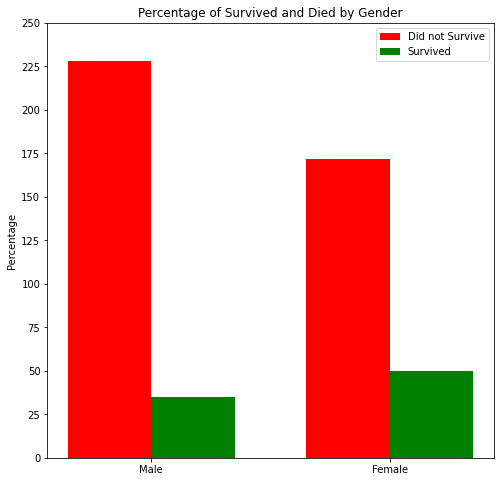

In [33]:
# Plot time!
import matplotlib.pyplot as plt

## your code here ##
N = 2

Died = (228, 172)
Survived = (35, 50)

#This is more graphical stuff
ind = np.arange(N) # the x locations for the groups
width = 0.35

#create a plot
fig, ax = plt.subplots(figsize = (8,8))

rects1 = ax.bar(ind, Died, width, color = 'r')
rects2 = ax.bar(ind+width, Survived, width, color = 'g')

#add the titles and legend
ax.set_title(r'Percentage of Survived and Died by Gender')
ax.set_ylabel('Percentage')
ax.set_yticks([0,25,50,75,100,125,150,175,200,225,250])
ax.set_xticks(ind+width/2)
ax.set_xticklabels(('Male', 'Female'))

ax.legend((rects1[0], rects2[0]), ('Did not Survive', 'Survived'))


Female characters are more likely to survive a slasher film than male characters, but both (unsuprisingly) don't have a good survival rate.